### Load Libraries

In [1]:
import numpy as np;print('numpy Version:', np.__version__)
import pandas as pd;print('pandas Version:', pd.__version__)
import xgboost
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.preprocessing import StandardScaler

numpy Version: 1.16.4
pandas Version: 0.24.2


In [2]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
# #!pip install plotly
# import plotly
# import plotly.graph_objs as go

from matplotlib.colors import ListedColormap

### How big dataset we want?

In [3]:
n_rows = int(1e7) #10M rows
n_columns = int(10)


In [4]:
df = make_classification(n_samples=n_rows, 
                         n_features=n_columns,
                         n_classes=2, 
                         n_informative=int(n_columns/5),
#                          class_sep = 1.0,
                         random_state=np.random.RandomState(43210))



    
pd_df = pd.DataFrame(df[0],columns=['x'+str(i) for i in range(1,n_columns+1)])
pd_df['y'] = df[1]
print(pd_df.head())

         x1        x2        x3        x4        x5        x6        x7  \
0 -1.262555 -1.101053  0.268411 -0.238257  1.005330 -0.823879 -1.789551   
1  1.116137  2.937065 -0.589762  0.988303 -0.327920  1.807532  0.008498   
2 -1.089892 -0.797442  0.285291  0.545492 -0.541531 -0.877648 -0.381660   
3  0.472545 -0.933903 -0.283729  0.491755  1.606102  0.881911  0.003818   
4 -0.364663 -0.835284 -0.258359  1.883538  2.024819  0.802976  0.071470   

         x8        x9       x10  y  
0 -0.336953 -0.910946  0.403634  0  
1  0.082102  2.220573  0.249461  1  
2  1.705320 -0.810525  0.303754  0  
3 -1.111311  0.075620  0.321872  1  
4  0.224536  0.075251  1.312871  1  


###  1. Train / Test split 

In [5]:
X, y = df[0],df[1]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Check dimensions

In [7]:

print('X_train: ', X_train.shape, X_train.dtype, 'y_train: ', y_train.shape, y_train.dtype)
print('X_validation', X_test.shape, X_test.dtype, 'y_test: ', y_test.shape, y_test.dtype)

X_train:  (8000000, 10) float64 y_train:  (8000000,) int64
X_validation (2000000, 10) float64 y_test:  (2000000,) int64


Write the dataset to disk as csv so that we can demontrate data loading.

In [8]:
%%time
pd.DataFrame(data = X_train).to_csv('X_train.csv', index=False)
pd.DataFrame(data = X_test).to_csv('X_test.csv',index=False)
pd.DataFrame(data = y_train).to_csv('y_train.csv', index=False)
pd.DataFrame(data = y_test).to_csv('y_test.csv',index=False)

CPU times: user 3min 9s, sys: 8.55 s, total: 3min 18s
Wall time: 3min 19s


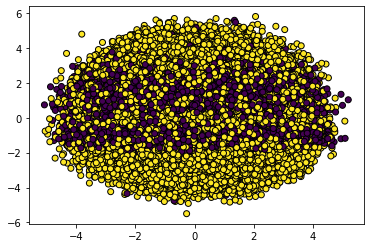

In [9]:
# plt.scatter(X_train[:, 0], X_train[:, 1], c=y, cmap=cm_bright,edgecolors='k')
cm_bright = ListedColormap(['#FF00FF', '#00FF00'])
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,edgecolors='k')

In [10]:
# https://github.com/rapidsai/notebooks-contrib/blob/master/getting_started_notebooks/intro_tutorials/07_Introduction_to_XGBoost.ipynb